In [5]:
import cv2
import os
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import load_img, img_to_array

In [6]:
train_dir = './data/training_set/training_set'
test_dir = "./data/test_set/test_set"

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [8]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.247.jpg', 'cat.959.jpg', 'cat.762.jpg', 'cat.2769.jpg', 'cat.2465.jpg', 'cat.66.jpg', 'cat.1263.jpg', 'cat.1666.jpg', 'cat.3914.jpg', 'cat.2309.jpg']
['dog.284.jpg', 'dog.1172.jpg', 'dog.953.jpg', 'dog.2620.jpg', 'dog.486.jpg', 'dog.2404.jpg', 'dog.1317.jpg', 'dog.291.jpg', 'dog.2066.jpg', 'dog.3313.jpg']


In [9]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total test cat images :', len(os.listdir(test_cats_dir)))
print('total test dog images :', len(os.listdir(test_dogs_dir)))

total training cat images : 4001
total training dog images : 4006
total test cat images : 1012
total test dog images : 1013


In [10]:
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

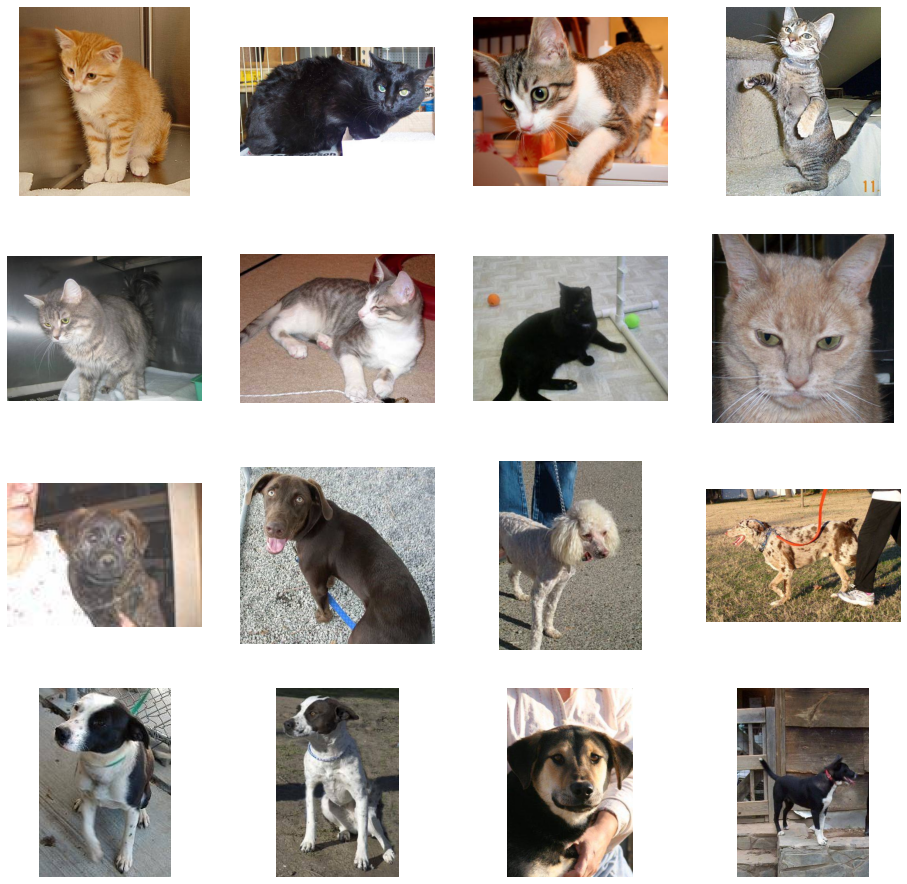

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='sigmoid')  
    ])

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 32)       1

In [14]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
model.save("model.keras")

In [15]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    steps_per_epoch=100,
                    epochs=9,
                    validation_steps=50,
                    verbose=2)
print("------------------------------------------------15 epochs--------------------------------------------------")
loaded_model = tf.keras.models.load_model("model.keras")
history2 = loaded_model.fit(train_generator,
                    validation_data=test_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50,
                    verbose=2)

Epoch 1/9
100/100 - 79s - loss: 0.9778 - accuracy: 0.5630 - val_loss: 5.2545 - val_accuracy: 0.5000 - 79s/epoch - 795ms/step
Epoch 2/9
100/100 - 74s - loss: 0.8322 - accuracy: 0.6015 - val_loss: 0.7160 - val_accuracy: 0.5770 - 74s/epoch - 743ms/step
Epoch 3/9
100/100 - 71s - loss: 0.7659 - accuracy: 0.6130 - val_loss: 0.7685 - val_accuracy: 0.5620 - 71s/epoch - 705ms/step
Epoch 4/9
100/100 - 69s - loss: 0.6523 - accuracy: 0.6736 - val_loss: 1.1104 - val_accuracy: 0.5470 - 69s/epoch - 687ms/step
Epoch 5/9
100/100 - 75s - loss: 0.6112 - accuracy: 0.6740 - val_loss: 1.5952 - val_accuracy: 0.5790 - 75s/epoch - 750ms/step
Epoch 6/9
100/100 - 76s - loss: 0.5855 - accuracy: 0.7185 - val_loss: 1.5067 - val_accuracy: 0.5680 - 76s/epoch - 765ms/step
Epoch 7/9
100/100 - 89s - loss: 0.5311 - accuracy: 0.7380 - val_loss: 0.6638 - val_accuracy: 0.6780 - 89s/epoch - 890ms/step
Epoch 8/9
100/100 - 98s - loss: 0.5335 - accuracy: 0.7360 - val_loss: 0.8980 - val_accuracy: 0.6240 - 98s/epoch - 981ms/step


1/1 [==============================] - 0s 288ms/step


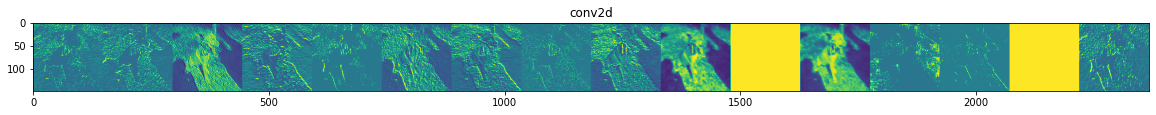

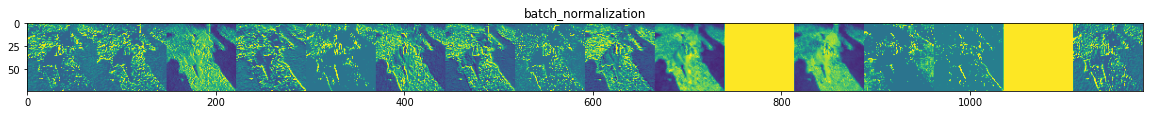

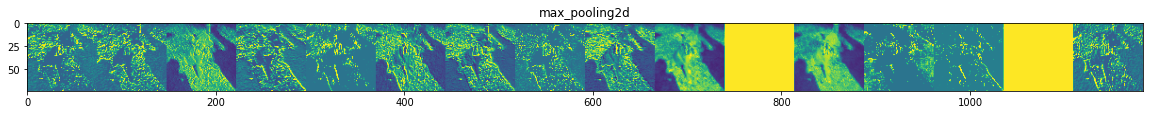

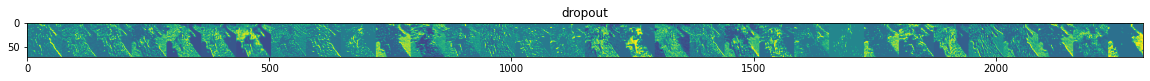

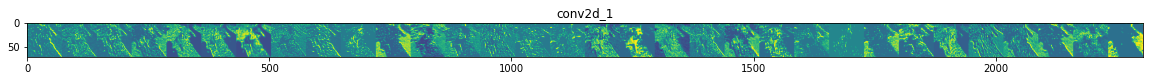

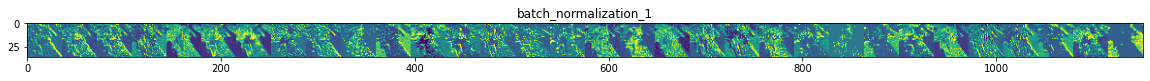

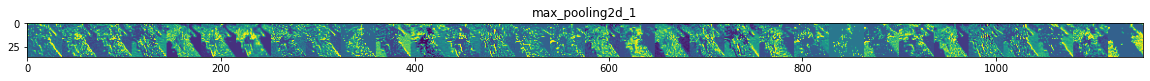

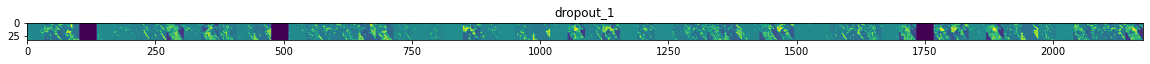

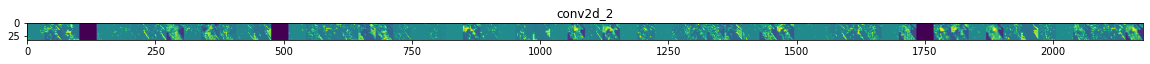

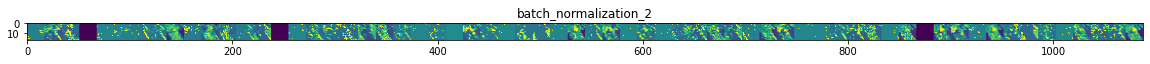

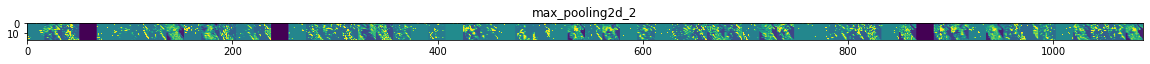

In [17]:
# Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]
    size       = feature_map.shape[1]
    
    display_grid = np.zeros((size, size * n_features))
    np.seterr(divide='ignore', invalid='ignore')
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 279ms/step
[1.]
kittens_basket.jpg is a dog
1/1 [==============================] - 0s 57ms/step
[1.]
cat_leafs.jpg is a dog
1/1 [==============================] - 0s 58ms/step
[1.]
dog_paddleboard.jpg is a dog
1/1 [==============================] - 0s 61ms/step
[1.]
dog_branch.jpg is a dog
1/1 [==============================] - 0s 67ms/step
[1.]
dog_forest.jpg is a dog
1/1 [==============================] - 0s 43ms/step
[1.]
cat_hand.jpg is a dog
1/1 [==============================] - 0s 57ms/step
[1.]
cat_bamboo.jpg is a dog
1/1 [==============================] - 0s 48ms/step
[1.]
dog_pughat.jpg is a dog
1/1 [==============================] - 0s 54ms/step
[1.]
dog_carwindow.jpg is a dog
1/1 [==============================] - 0s 57ms/step
[1.]
cat_bandana.jpg is a dog


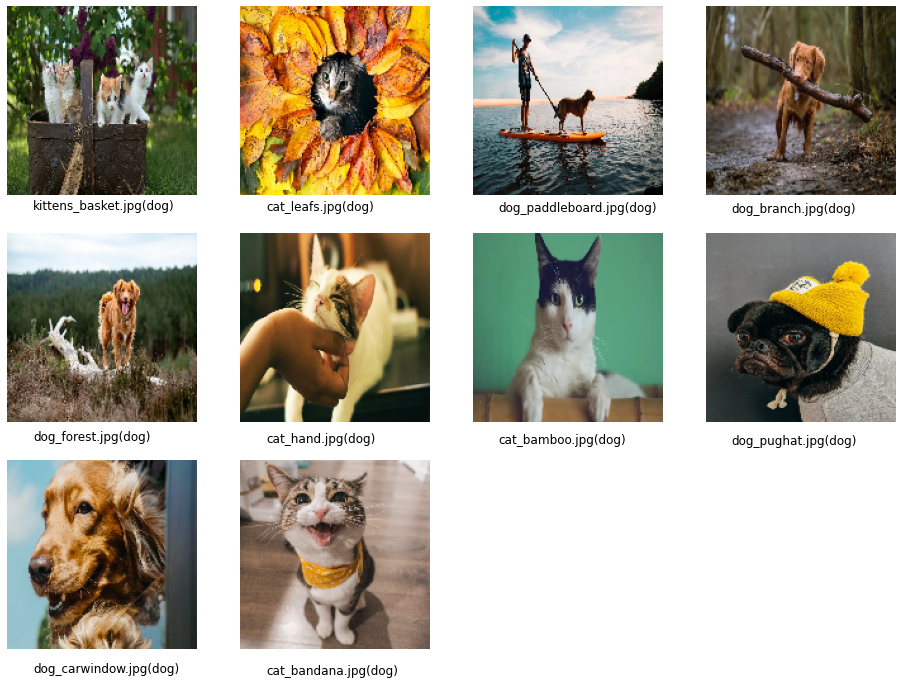

In [18]:
test_filenames = './data/test_set/test/'
test_fl = '/data/test_set/test/'

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

for i, fn in enumerate(os.listdir(test_filenames)):
 
  # predicting images
  path = os.getcwd() + test_fl + fn;
  img = load_img(path, target_size=(150, 150))  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  plt.imshow(img)
  
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    plt.text(20, i + 160, fn + "(dog)", fontsize=12)
  else:
    print(fn + " is a cat")
    plt.text(20, i + 160, fn + "(cat)", fontsize=12)
plt.show()

------------------------------------------------15 epochs--------------------------------------------------
1/1 [==============================] - 0s 212ms/step
[1.]
kittens_basket.jpg is a dog
1/1 [==============================] - 0s 49ms/step
[0.]
cat_leafs.jpg is a cat
1/1 [==============================] - 0s 44ms/step
[1.]
dog_paddleboard.jpg is a dog
1/1 [==============================] - 0s 48ms/step
[1.]
dog_branch.jpg is a dog
1/1 [==============================] - 0s 51ms/step
[1.]
dog_forest.jpg is a dog
1/1 [==============================] - 0s 52ms/step
[1.]
cat_hand.jpg is a dog
1/1 [==============================] - 0s 43ms/step
[3.7730527e-38]
cat_bamboo.jpg is a dog
1/1 [==============================] - 0s 45ms/step
[1.]
dog_pughat.jpg is a dog
1/1 [==============================] - 0s 53ms/step
[1.]
dog_carwindow.jpg is a dog
1/1 [==============================] - 0s 49ms/step
[1.3753497e-27]
cat_bandana.jpg is a dog


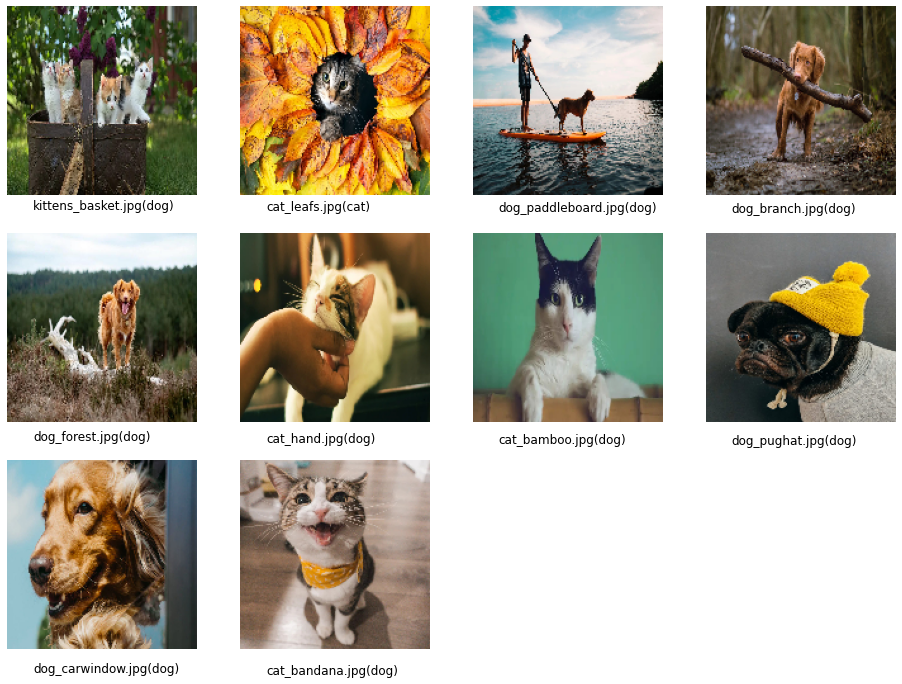

In [19]:
print("------------------------------------------------15 epochs--------------------------------------------------")
test_filenames = './data/test_set/test/'
test_fl = '/data/test_set/test/'

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

for i, fn in enumerate(os.listdir(test_filenames)):
 
  # predicting images
  path = os.getcwd() + test_fl + fn;
  img = load_img(path, target_size=(150, 150))  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  plt.imshow(img)
  
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = loaded_model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    plt.text(20, i + 160, fn + "(dog)", fontsize=12)
  else:
    print(fn + " is a cat")
    plt.text(20, i + 160, fn + "(cat)", fontsize=12)
    
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

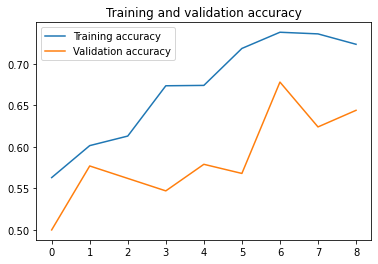

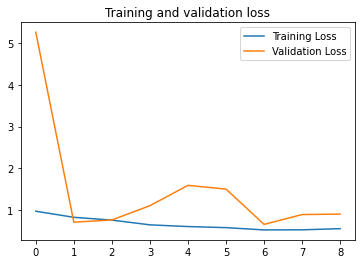

In [20]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs,     acc, label="Training accuracy")
plt.plot  (epochs, val_acc, label="Validation accuracy")
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs,     loss, label="Training Loss")
plt.plot  (epochs, val_loss, label="Validation Loss")
plt.legend()
plt.title ('Training and validation loss')

------------------------------------------------15 epochs--------------------------------------------------


Text(0.5, 1.0, 'Training and validation loss')

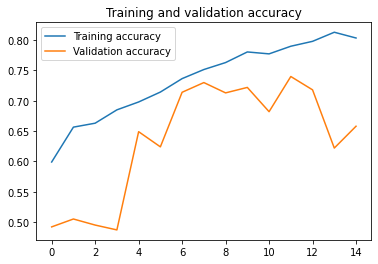

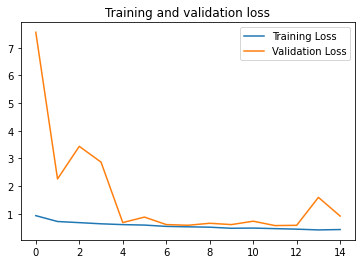

In [21]:
print("------------------------------------------------15 epochs--------------------------------------------------")
acc      = history2.history['accuracy']
val_acc  = history2.history['val_accuracy']
loss     = history2.history['loss']
val_loss = history2.history['val_loss']

epochs   = range(len(acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs,     acc, label="Training accuracy" )
plt.plot  (epochs, val_acc, label="Validation accuracy")
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs,     loss, label="Training Loss")
plt.plot  (epochs, val_loss, label="Validation Loss")
plt.legend()
plt.title ('Training and validation loss')

In [23]:
loaded_model.save('model.kf')

INFO:tensorflow:Assets written to: model.kf/assets


INFO:tensorflow:Assets written to: model.kf/assets
